In [69]:
import requests

url_get = requests.get("https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019")

In [70]:
url_get.content[1:777]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://monexnews.com/" target="_self" />\n<title>Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews</title>\n<meta name="description" content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " />\n<meta name="keywords" content="Kurs yen, jpy, nilai tukar yen, monexnews" />\n<meta property="og:image" content="favicon.jpg" />\n<meta name="author" content="Ultimaengine.co'

In [71]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [74]:
print(soup.prettify()[:1000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://monexnews.com/" target="_self"/>
  <title>
   Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews
  </title>
  <meta content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " name="description"/>
  <meta content="Kurs yen, jpy, nilai tukar yen, monexnews" name="keywords"/>
  <meta content="favicon.jpg" property="og:image"/>
  <meta content="Ultimaengine.com" name="author"/>
  <meta content="follow, index" name="robots"/>
  <meta content="7 days" name="revisit-after"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="M7NOlgqcEadhl

In [42]:
table = soup.find('table', attrs={'class':'table'})
print(table.prettify()[1:500])

table class="table">
 <tr>
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   31 Desember 2019
  </td>
  <td>
   128,62
  </td>
  <td>
   127,32
  </td>
 </tr>
 <tr>
  <td>
   30 Desember 2019
  </td>
  <td>
   128,30
  </td>
  <td>
   127,02
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   27 Desember 2019
  </td>
  <td>
   128,11
  </td>
  <td>
   126,83
  </td>
 </tr>
 <tr>
  <td>
   26 Desember 2019
  </td>
  <td>
   128,


In [67]:
tr = table.find_all('tr')
tr[:] # just call 2 founded tr

[<tr>
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>31 Desember 2019</td>
 <td>128,62</td>
 <td>127,32</td>
 </tr>,
 <tr>
 <td>30 Desember 2019</td>
 <td>128,30</td>
 <td>127,02</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>27 Desember 2019</td>
 <td>128,11</td>
 <td>126,83</td>
 </tr>,
 <tr>
 <td>26 Desember 2019</td>
 <td>128,27</td>
 <td>126,98</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>23 Desember 2019</td>
 <td>128,39</td>
 <td>127,10</td>
 </tr>,
 <tr>
 <td>20 Desember 2019</td>
 <td>128,63</td>
 <td>127,34</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>19 Desember 2019</td>
 <td>128,24</td>
 <td>126,93</td>
 </tr>,
 <tr>
 <td>18 Desember 2019</td>
 <td>128,64</td>
 <td>127,32</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>17 Desember 2019</td>
 <td>128,62</td>
 <td>127,33</td>
 </tr>,
 <tr>
 <td>16 Desember 2019</td>
 <td>128,67</td>
 <td>127,36</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>13 Desember 2019</td>
 <td>128,30</td>
 <

In [75]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get tanggal
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip() #for removing the excess whitespace
    tanggal = tanggal.replace(u'\xa0', u' ')
    
    #get ask (kurs jual)
    kurs_jual = row.find_all('td')[1].text
    kurs_jual = kurs_jual.strip() #for removing the excess whitespace
    
    #get bid (kurs beli)
    kurs_beli = row.find_all('td')[2].text
    kurs_beli = kurs_beli.strip() #for removing the excess whitespace
    
    temp.append((tanggal, kurs_jual, kurs_beli)) 
    
temp 

[('31 Desember 2019', '128,62', '127,32'),
 ('30 Desember 2019', '128,30', '127,02'),
 ('27 Desember 2019', '128,11', '126,83'),
 ('26 Desember 2019', '128,27', '126,98'),
 ('23 Desember 2019', '128,39', '127,10'),
 ('20 Desember 2019', '128,63', '127,34'),
 ('19 Desember 2019', '128,24', '126,93'),
 ('18 Desember 2019', '128,64', '127,32'),
 ('17 Desember 2019', '128,62', '127,33'),
 ('16 Desember 2019', '128,67', '127,36'),
 ('13 Desember 2019', '128,30', '127,02'),
 ('12 Desember 2019', '130,04', '128,71'),
 ('11 Desember 2019', '129,65', '128,34'),
 ('10 Desember 2019', '129,56', '128,26'),
 ('09 Desember 2019', '129,76', '128,44'),
 ('06 Desember 2019', '129,78', '128,45'),
 ('05 Desember 2019', '130,10', '128,77'),
 ('04 Desember 2019', '130,79', '129,45'),
 ('03 Desember 2019', '130,15', '128,82'),
 ('02 Desember 2019', '129,36', '128,04'),
 ('29 November 2019', '129,44', '128,12'),
 ('28 November 2019', '129,47', '128,15'),
 ('27 November 2019', '129,84', '128,53'),
 ('26 Novem

In [76]:
temp = temp[::-1]
temp

[('02 Januari 2019', '132,89', '131,54'),
 ('03 Januari 2019', '135,44', '134,08'),
 ('04 Januari 2019', '133,51', '132,17'),
 ('07 Januari 2019', '130,86', '129,51'),
 ('08 Januari 2019', '129,84', '128,52'),
 ('09 Januari 2019', '130,31', '129,00'),
 ('10 Januari 2019', '131,22', '129,88'),
 ('11 Januari 2019', '130,62', '129,31'),
 ('14 Januari 2019', '130,52', '129,19'),
 ('15 Januari 2019', '130,56', '129,23'),
 ('16 Januari 2019', '131,11', '129,75'),
 ('17 Januari 2019', '130,61', '129,27'),
 ('18 Januari 2019', '130,37', '129,03'),
 ('21 Januari 2019', '130,31', '128,98'),
 ('22 Januari 2019', '130,39', '129,07'),
 ('23 Januari 2019', '130,05', '128,75'),
 ('24 Januari 2019', '129,79', '128,48'),
 ('25 Januari 2019', '129,68', '128,37'),
 ('28 Januari 2019', '128,97', '127,65'),
 ('29 Januari 2019', '129,74', '128,43'),
 ('30 Januari 2019', '129,79', '128,47'),
 ('31 Januari 2019', '129,92', '128,60'),
 ('01 Februari 2019', '129,05', '127,75'),
 ('04 Februari 2019', '128,24', '

In [77]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('tanggal', 'kurs_jual', 'kurs_beli'))
df.head()

,tanggal,kurs_jual,kurs_beli
0,02 Januari 2019,"132,89","131,54"
1,03 Januari 2019,"135,44","134,08"
2,04 Januari 2019,"133,51","132,17"
3,07 Januari 2019,"130,86","129,51"
4,08 Januari 2019,"129,84","128,52"


In [78]:
df['kurs_jual'] = df['kurs_jual'].str.replace(",",".")
df['kurs_beli'] = df['kurs_beli'].str.replace(",",".")

df.head()

,tanggal,kurs_jual,kurs_beli
0,02 Januari 2019,132.89,131.54
1,03 Januari 2019,135.44,134.08
2,04 Januari 2019,133.51,132.17
3,07 Januari 2019,130.86,129.51
4,08 Januari 2019,129.84,128.52


In [79]:
import dateparser

In [80]:
df['tanggal'] = df['tanggal'].apply(lambda x: dateparser.parse(x))

In [81]:
df

,tanggal,kurs_jual,kurs_beli
0,2019-01-02,132.89,131.54
1,2019-01-03,135.44,134.08
2,2019-01-04,133.51,132.17
3,2019-01-07,130.86,129.51
4,2019-01-08,129.84,128.52
...,...,...,...
241,2019-12-23,128.39,127.10
242,2019-12-26,128.27,126.98
243,2019-12-27,128.11,126.83
244,2019-12-30,128.30,127.02


In [82]:
df[['kurs_jual', 'kurs_beli']] = df[['kurs_jual', 'kurs_beli']].astype('float64')

df.dtypes

tanggal      datetime64[ns]
kurs_jual           float64
kurs_beli           float64
dtype: object

In [83]:
df = df.set_index("tanggal")

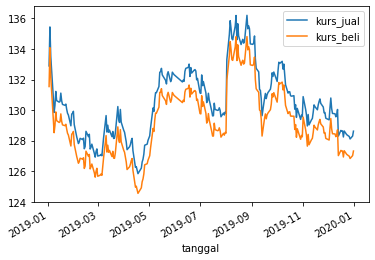

In [91]:
df.plot()

In [99]:
df2 = df
df2.head()

,kurs_jual,kurs_beli
tanggal,,
2019-01-02,132.89,131.54
2019-01-03,135.44,134.08
2019-01-04,133.51,132.17
2019-01-07,130.86,129.51
2019-01-08,129.84,128.52


In [101]:
df2 = df2.reset_index()
df2.head()

,index,tanggal,kurs_jual,kurs_beli
0,0,2019-01-02,132.89,131.54
1,1,2019-01-03,135.44,134.08
2,2,2019-01-04,133.51,132.17
3,3,2019-01-07,130.86,129.51
4,4,2019-01-08,129.84,128.52


In [112]:
df2['periode'] = df2['tanggal'].dt.to_period('M')
df2.head()

KeyError: 'tanggal'

In [121]:
df2 = df2.groupby('periode').mean().round(2)
df2

,kurs_jual,kurs_beli
periode,,
2019-01,130.75,129.42
2019-02,127.86,126.57
2019-03,128.52,127.22
2019-04,127.37,126.07
2019-05,131.47,130.14
2019-06,132.40,131.05
2019-07,130.46,129.13
2019-08,134.74,133.37
2019-09,132.01,130.66


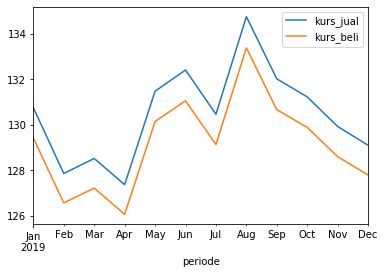

In [122]:
df2.plot()